In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


# **IMPORTING MODULES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

In [ ]:
ml1 = pd.read_csv('/content/drive/MyDrive/ml1/avocado2.csv')

# **Linear Regression**

**Fitting  a linear model to the data to predict the prices of avocados using linear regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

ml1 = pd.read_csv('/content/drive/MyDrive/ml1/avocado2.csv')
ml = ml1[['Date', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'AveragePrice']]
X = ml.drop(columns=['AveragePrice'])
y = ml['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)


Mean Squared Error (MSE): 0.08456285889802755
Root Mean Squared Error (RMSE): 0.290796937566453
R-squared: 0.4164295633005345


# **statsmodels.summary()**

**Assess the strength of the relationship between independent and dependent variables through statsmodels.summary()**

In [ ]:
X_train_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_const).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1004.
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:55:54   Log-Likelihood:                -2385.2
No. Observations:               14432   AIC:                             4794.
Df Residuals:                   14420   BIC:                             4885.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8105      0.047     17.217   

**const :** constant(bias)

**coef :** Estimated coefficients for each independent variable.

std err : Measures of variability or uncertainty

**t :** It is coefficient divided by its standard error.

**P :** If the p-value is less than a predetermined significance level (often 0.05), there is statistically significant relationship between the independent variable and the dependent variable.

[0.025, 0.975] : These values represent the 95% confidence interval for the coefficient.

0.025: lower bound

0.975: upper bound

# **Correlation Matrix**

**Interpret the strength of the relationship between independent and dependent variable via the correlation matrix.**


In [ ]:
import pandas as pd

# Load data from CSV file into a DataFrame
ml1 = pd.read_csv('/content/drive/MyDrive/ml1/avocado2.csv')

# Get column names starting with 'region_'
region_columns = [col for col in ml1.columns if col.startswith('region_')]

# Remove the region columns
ml1 = ml1.drop(columns=region_columns)

# Compute correlation matrix
correlation_matrix = ml1.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Define independent variables
independent_variables = [col for col in ml1.columns if col != 'AveragePrice']

# Print correlation coefficients and strength of correlation for each independent variable
for variable in independent_variables:
    correlation_coefficient = correlation_matrix.loc[variable, 'AveragePrice']
    print(f"\nThe correlation coefficient between {variable} and AveragePrice is: {correlation_coefficient}")
    if correlation_coefficient > 0.5:
        print("There is a strong positive correlation.")
    elif correlation_coefficient < -0.5:
        print("There is a strong negative correlation.")
    elif 0.3 < correlation_coefficient < 0.5:
        print("There is a moderate positive correlation.")
    elif -0.5 < correlation_coefficient < -0.3:
        print("There is a moderate negative correlation.")
    else:
        print("There is a weak or no correlation.")


Correlation Matrix:
                  Date  Total Volume      4046      4225      4770  \
Date          1.000000     -0.866733 -0.282947 -0.240450 -0.075125   
Total Volume -0.866733      1.000000  0.411347  0.370545  0.207119   
4046         -0.282947      0.411347  1.000000 -0.310591  0.051289   
4225         -0.240450      0.370545 -0.310591  1.000000  0.101646   
4770         -0.075125      0.207119  0.051289  0.101646  1.000000   
Total Bags   -0.030418     -0.260845 -0.365932 -0.560439 -0.160403   
Small Bags   -0.021179     -0.252934 -0.242162 -0.476267 -0.074426   
Large Bags    0.040102     -0.080724 -0.192839 -0.130540 -0.131583   
XLarge Bags  -0.225926      0.203658  0.064712  0.115497  0.217304   
type          0.990708     -0.869666 -0.307839 -0.261190 -0.101618   
year          0.991656     -0.871510 -0.305861 -0.257890 -0.094374   
AveragePrice  0.471017     -0.467104 -0.320536  0.045917 -0.092229   

              Total Bags  Small Bags  Large Bags  XLarge Bags      ty

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
correlation_matrix = ml1.corr()
average_price_correlation = correlation_matrix['AveragePrice'].drop('AveragePrice')
print(average_price_correlation)


Date            0.471017
Total Volume   -0.467104
4046           -0.320536
4225            0.045917
4770           -0.092229
Total Bags      0.084143
Small Bags      0.188220
Large Bags     -0.071685
XLarge Bags    -0.178588
type            0.490542
year            0.486245
Name: AveragePrice, dtype: float64


**Calculating positive threshold and negative threshold for average price correlation values.**

In [ ]:
positive_correlation = []
negative_correlation = []

for i, corr in enumerate(average_price_correlation):
        if corr > 0:
            positive_correlation.append(corr)
        elif corr < 0:
            negative_correlation.append(corr)

mean_positive_corr = np.mean(positive_correlation)
mean_negative_corr = np.mean(negative_correlation)

print("Mean positive correlation with AveragePrice:", mean_positive_corr)
print("Mean negative correlation with AveragePrice:", mean_negative_corr)

Mean positive correlation with AveragePrice: 0.29434722953180725
Mean negative correlation with AveragePrice: -0.226028367481481


**Selecting features that are either above the positive threshold or below the negative threshold.**

In [ ]:
selected_features = []

feature_names = correlation_matrix.index.drop('AveragePrice')

for feature, corr in zip(feature_names, average_price_correlation):
    if corr > mean_positive_corr or corr < mean_negative_corr:
        selected_features.append(feature)

print("Selected features:", selected_features)



Selected features: ['Date', 'Total Volume', '4046', 'type', 'year']


# **Scatter Plot**

**Produce a scatterplots for each of the independent variable against the dependent variable (price)**

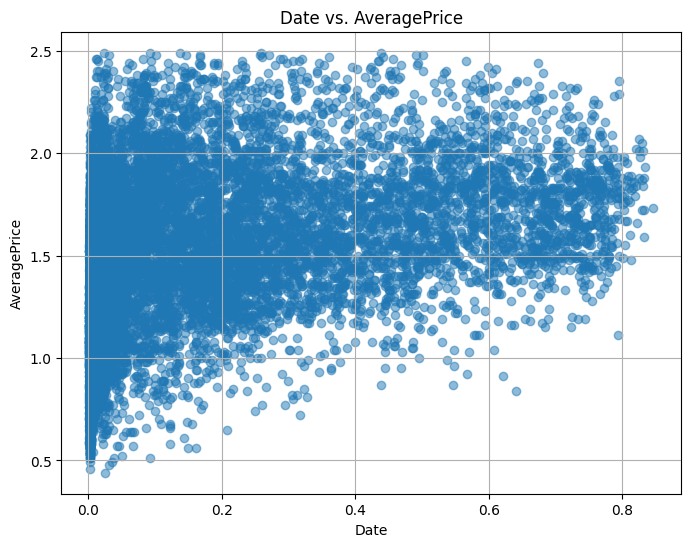

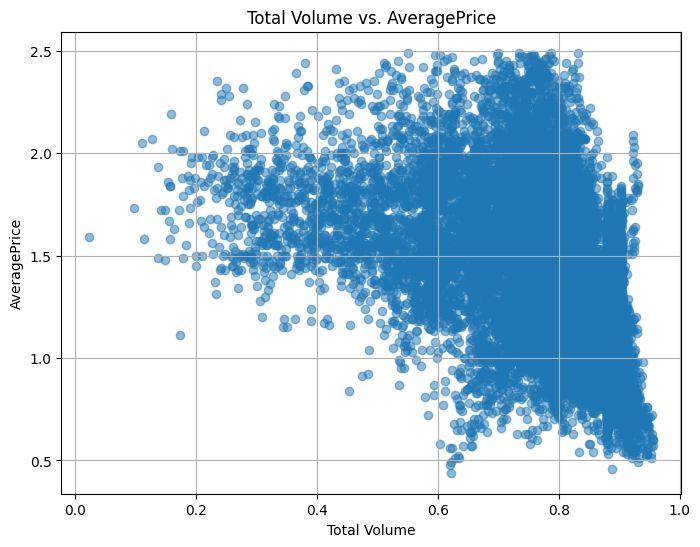

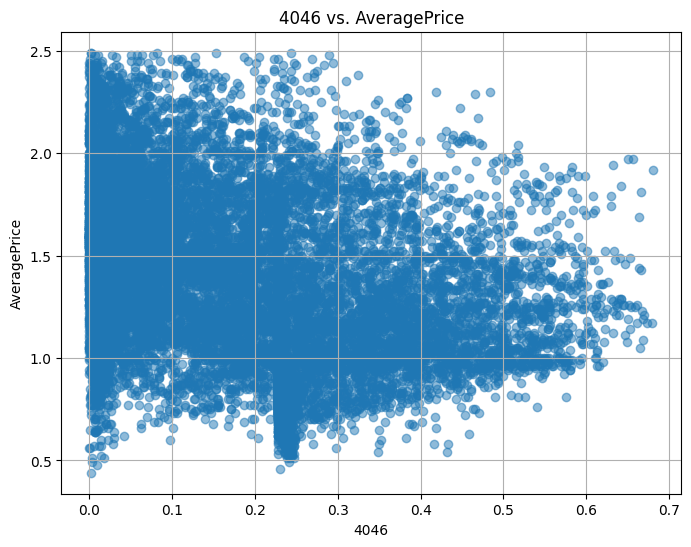

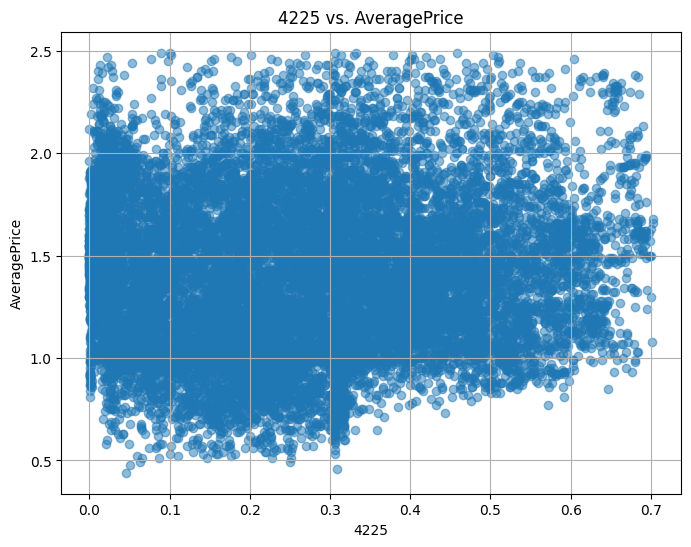

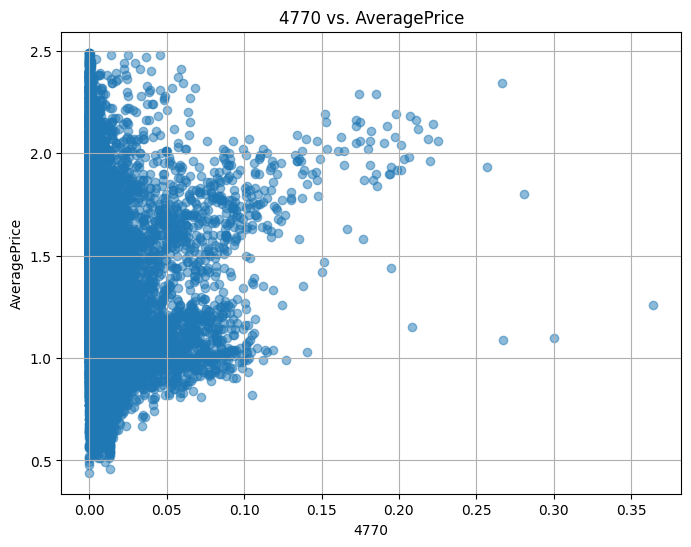

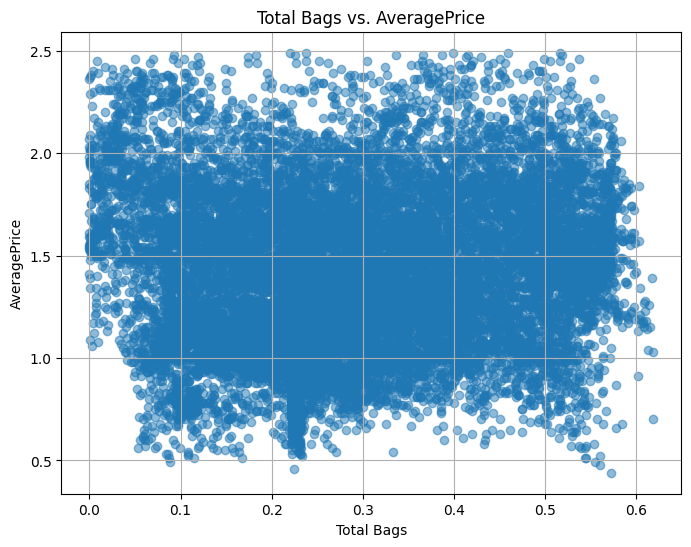

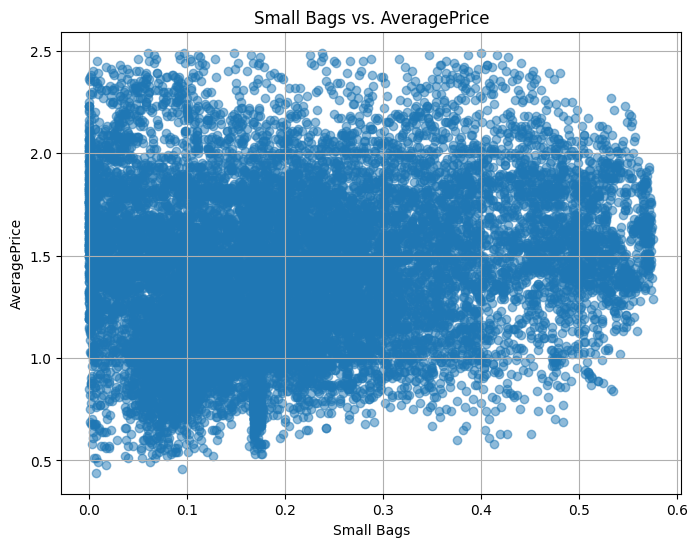

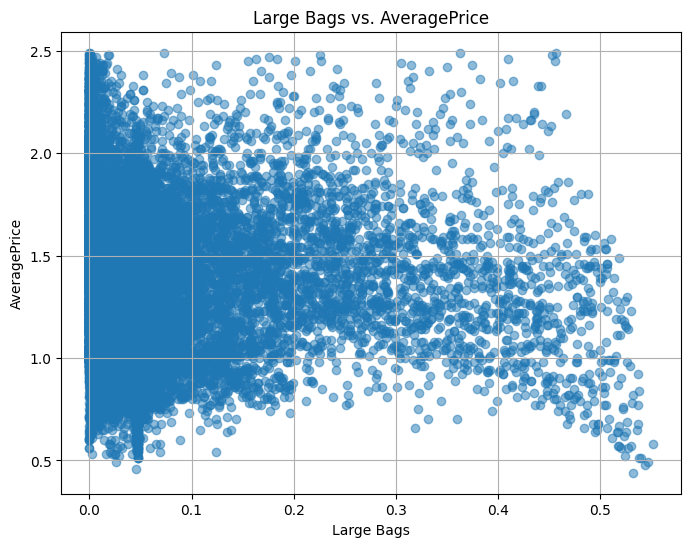

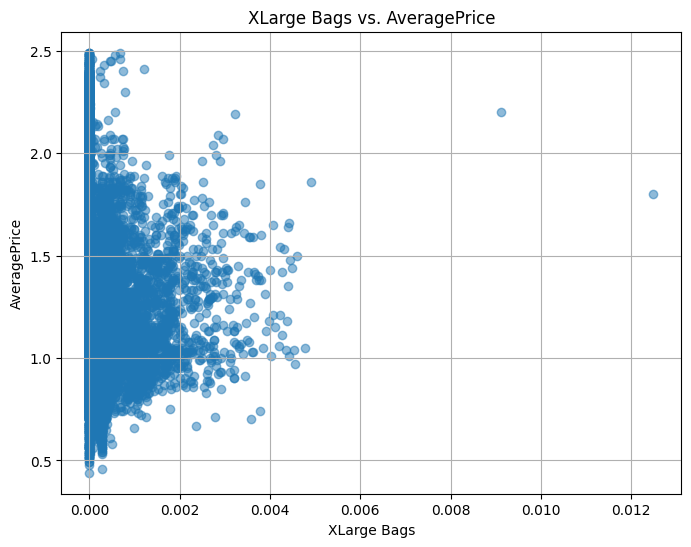

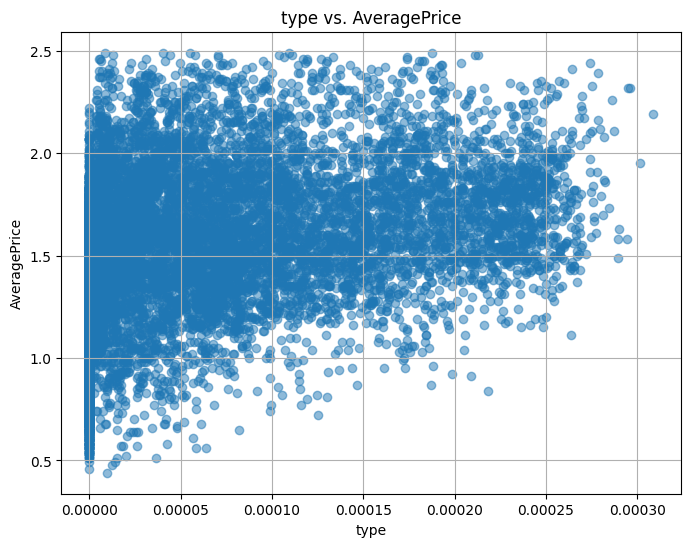

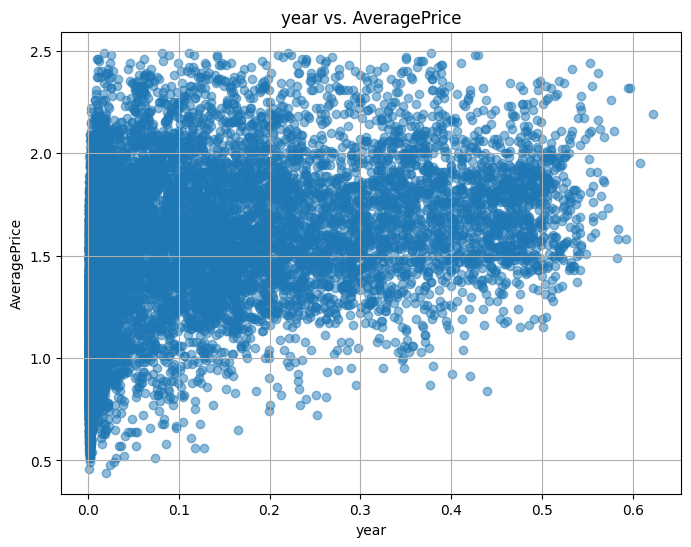

In [ ]:
for column in X:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[column], ml1['AveragePrice'], alpha=0.5)
    plt.title(f'{column} vs. AveragePrice')
    plt.xlabel(column)
    plt.ylabel('AveragePrice')
    plt.grid(True)
    plt.show()

# **Variables used for Prediction**

Based on the scatterplots and correlation values, identify which variable(s) you will use to predict the price of avocados.

Use the appropriate independent variables and fit a linear model to the data to predict the prices of avocados using linear regression. **bold text**

In [ ]:
X = ml[selected_features]

y = ml['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Squared Error (MSE): 0.10639683866748985
Root Mean Squared Error (RMSE): 0.32618528272668873
R-squared: 0.26575271444520776


R-squared value is a measure of how well the independent variables explain the variability of the dependent variable.Here it is around 26%.



In [ ]:
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared:", adj_r2)

Mean Absolute Error (MAE): 0.2613251060160628
Adjusted R-squared: 0.26473349278286074
